In [22]:


!pip install filterpy
from filterpy.kalman import KalmanFilter


In [23]:
import numpy as np
import pandas as pd

In [24]:
df = pd.read_csv('/content/train.csv')
df

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [25]:
df_sauloc = df[df['Publication_Day'] == 'Wednesday']
df_sauloc.to_csv('wednesday_publications.csv', index=False)


In [26]:
df_sauloc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107886 entries, 13 to 749992
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           107886 non-null  int64  
 1   Podcast_Name                 107886 non-null  object 
 2   Episode_Title                107886 non-null  object 
 3   Episode_Length_minutes       95327 non-null   float64
 4   Genre                        107886 non-null  object 
 5   Host_Popularity_percentage   107886 non-null  float64
 6   Publication_Day              107886 non-null  object 
 7   Publication_Time             107886 non-null  object 
 8   Guest_Popularity_percentage  87131 non-null   float64
 9   Number_of_Ads                107886 non-null  float64
 10  Episode_Sentiment            107886 non-null  object 
 11  Listening_Time_minutes       107886 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 10.7+ MB


In [27]:
df_sauloc.isnull().sum()

,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,12559
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,20755
Number_of_Ads,0


In [28]:
df_sauloc['Episode_Length_minutes'] = df_sauloc['Episode_Length_minutes'].interpolate(method='linear')
df_sauloc['Guest_Popularity_percentage'] = df_sauloc['Guest_Popularity_percentage'].interpolate(method='linear')
print(df_sauloc.isnull().sum())


id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64


<ipython-input-28-6fe810338a45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sauloc['Episode_Length_minutes'] = df_sauloc['Episode_Length_minutes'].interpolate(method='linear')
<ipython-input-28-6fe810338a45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sauloc['Guest_Popularity_percentage'] = df_sauloc['Guest_Popularity_percentage'].interpolate(method='linear')


<ipython-input-32-61c67844b2b8>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sauloc[f"{col}_Kalman"] = bo_loc_kalman(df_sauloc[col].values)


Cảnh báo: Cột chứa giá trị không phải số, bỏ qua lọc Kalman cho cột này.


<ipython-input-32-61c67844b2b8>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sauloc[f"{col}_Kalman"] = bo_loc_kalman(df_sauloc[col].values)
<ipython-input-32-61c67844b2b8>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sauloc[f"{col}_Kalman"] = bo_loc_kalman(df_sauloc[col].values)


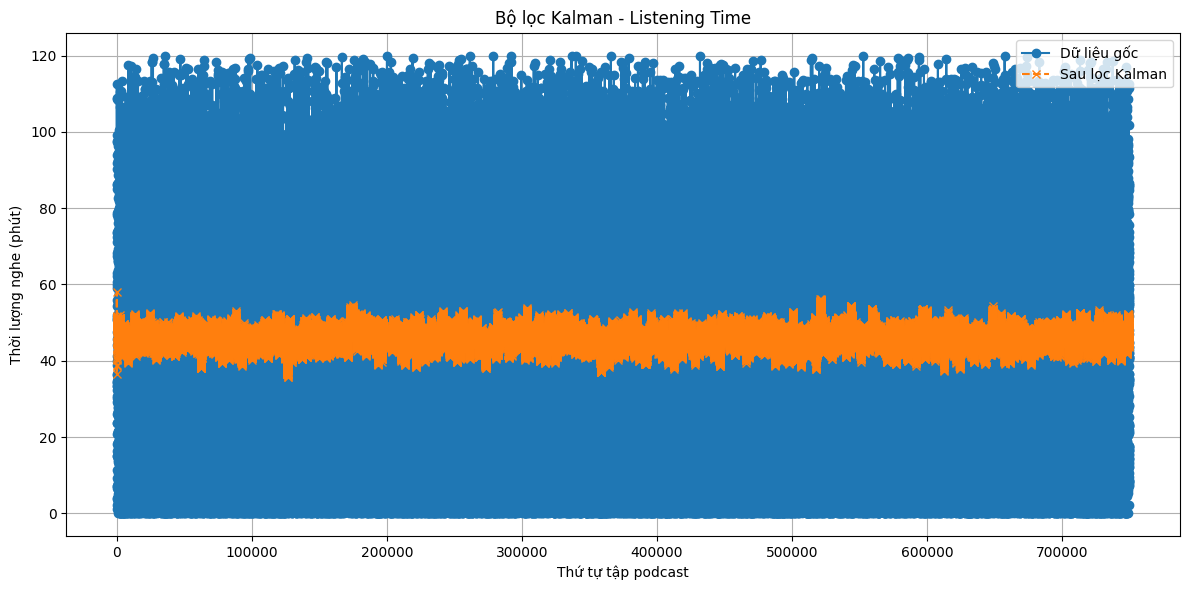

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Hàm lọc Kalman cơ bản
def bo_loc_kalman(danh_sach_gia_tri, nhieu_he_thong=1e-5, nhieu_do_luong=1):
    # Kiểm tra nếu danh_sach_gia_tri chứa chuỗi, chuyển đổi sang số nếu có thể
    if danh_sach_gia_tri.dtype == object:  # Kiểm tra kiểu dữ liệu là object (thường chứa chuỗi)
        try:
            danh_sach_gia_tri = pd.to_numeric(danh_sach_gia_tri, errors='raise')
        except ValueError:
            print("Cảnh báo: Cột chứa giá trị không phải số, bỏ qua lọc Kalman cho cột này.")
            return danh_sach_gia_tri  # Trả về nguyên vẹn nếu không thể chuyển đổi

    so_luong = len(danh_sach_gia_tri)
    danh_sach_du_doan = np.zeros(so_luong)

    du_doan_hien_tai = danh_sach_gia_tri[0]
    sai_so_uoc_luong = 1.0

    for i in range(so_luong):
        he_so_kalman = sai_so_uoc_luong / (sai_so_uoc_luong + nhieu_do_luong)
        du_doan_hien_tai = du_doan_hien_tai + he_so_kalman * (danh_sach_gia_tri[i] - du_doan_hien_tai)
        danh_sach_du_doan[i] = du_doan_hien_tai
        sai_so_uoc_luong = (1 - he_so_kalman) * sai_so_uoc_luong + abs(du_doan_hien_tai - danh_sach_gia_tri[i]) * nhieu_he_thong

    return danh_sach_du_doan

# -------- Giả sử df_sauloc đã được load từ trước --------
# Ví dụ: df_sauloc = pd.read_csv("du_lieu_podcast.csv")

# Các cột sẽ được lọc Kalman (chỉ lọc các cột số có thể nhiễu)
cols_can_loc = [
    "Episode_Length_minutes",
    "Host_Popularity_percentage",
    "Guest_Popularity_percentage",
    "Number_of_Ads",
    "Episode_Sentiment",
    "Listening_Time_minutes"
]

# Áp dụng bộ lọc Kalman cho từng cột
for col in cols_can_loc:
    if col in df_sauloc.columns:
        df_sauloc[f"{col}_Kalman"] = bo_loc_kalman(df_sauloc[col].values)

# -------- Vẽ biểu đồ cho Listening_Time_minutes --------
plt.figure(figsize=(12, 6))
plt.plot(df_sauloc["Listening_Time_minutes"], label="Dữ liệu gốc", marker='o')
plt.plot(df_sauloc["Listening_Time_minutes_Kalman"], label="Sau lọc Kalman", linestyle="--", marker='x')
plt.title("Bộ lọc Kalman - Listening Time")
plt.xlabel("Thứ tự tập podcast")
plt.ylabel("Thời lượng nghe (phút)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-39-641ad5a18b55>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sauloc['Listening_Time_minutes_EKF'] = filtered_listening_times


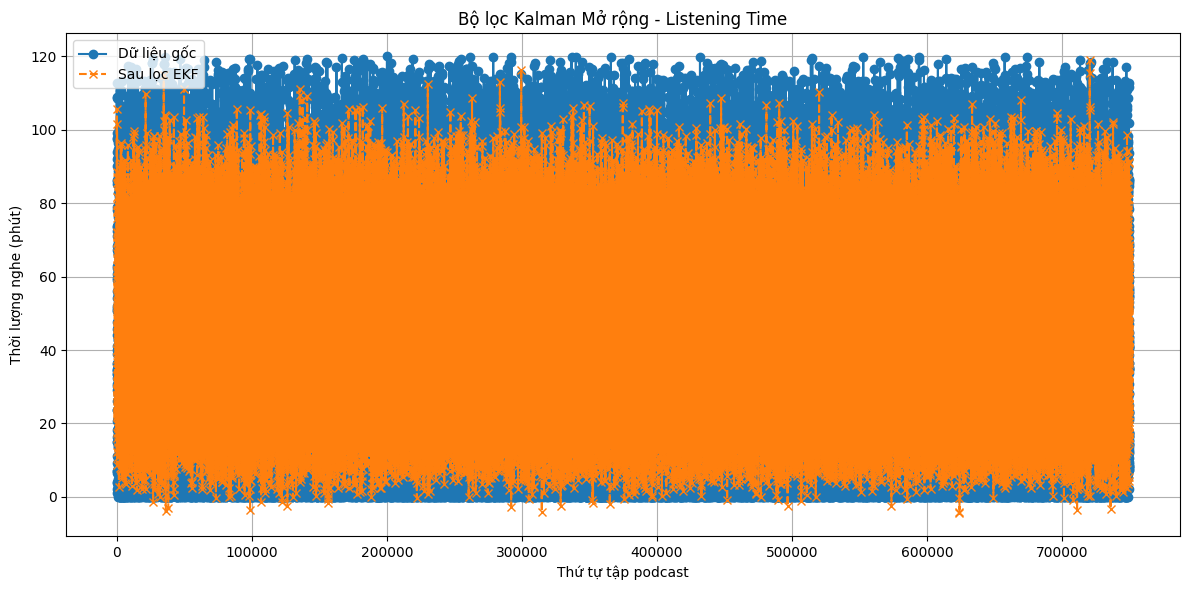

In [39]:

import matplotlib.pyplot as plt
from filterpy.kalman import ExtendedKalmanFilter
import numpy as np

# Define the Extended Kalman Filter
def extended_kalman_filter(measurements, dt=1.0):
    # Define state transition function
    def fx(x, dt):
        # Example: Simple linear motion model (replace with your actual model)
        F = np.array([[1, dt], [0, 1]])
        return np.dot(F, x)

    # Define measurement function
    def hx(x):
        # Example: Direct measurement (replace with your actual model)
        H = np.array([[1, 0]])
        return np.dot(H, x)

    # Define the Jacobian of the measurement function
    def HJacobian(x):
        # For this simple example, the Jacobian is constant
        return np.array([[1, 0]])

    # Initialize the EKF
    ekf = ExtendedKalmanFilter(dim_x=2, dim_z=1)  # dim_x = state vector dimension, dim_z = measurement dimension
    ekf.x = np.array([0., 0.])  # Initial state estimate
    ekf.P = np.eye(2) * 100  # Initial covariance matrix
    ekf.F = np.array([[1, dt], [0, 1]])  # State transition matrix
    ekf.R = np.array([[1.]])  # Measurement noise covariance
    ekf.Q = np.eye(2) * 0.1  # Process noise covariance
    ekf.fx = fx
    ekf.hx = hx

    # Perform filtering
    filtered_measurements = []
    for measurement in measurements:
        ekf.predict()
        # Pass HJacobian and hx to the update method
        ekf.update(np.array([measurement]), HJacobian=HJacobian, Hx=hx)
        filtered_measurements.append(ekf.x[0]) # Append the estimated state value

    return np.array(filtered_measurements)

# Apply the EKF to the 'Listening_Time_minutes' column of df_sauloc
if 'Listening_Time_minutes' in df_sauloc.columns:
    listening_times = df_sauloc['Listening_Time_minutes'].values
    filtered_listening_times = extended_kalman_filter(listening_times)
    df_sauloc['Listening_Time_minutes_EKF'] = filtered_listening_times

# Now you can visualize the filtered data
plt.figure(figsize=(12, 6))
plt.plot(df_sauloc['Listening_Time_minutes'], label="Dữ liệu gốc", marker='o')
if 'Listening_Time_minutes_EKF' in df_sauloc.columns:
    plt.plot(df_sauloc["Listening_Time_minutes_EKF"], label="Sau lọc EKF", linestyle="--", marker='x')
plt.title("Bộ lọc Kalman Mở rộng - Listening Time")
plt.xlabel("Thứ tự tập podcast")
plt.ylabel("Thời lượng nghe (phút)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-40-a7b098ecba1d>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sauloc['Listening_Time_minutes_UKF'] = filtered_listening_times


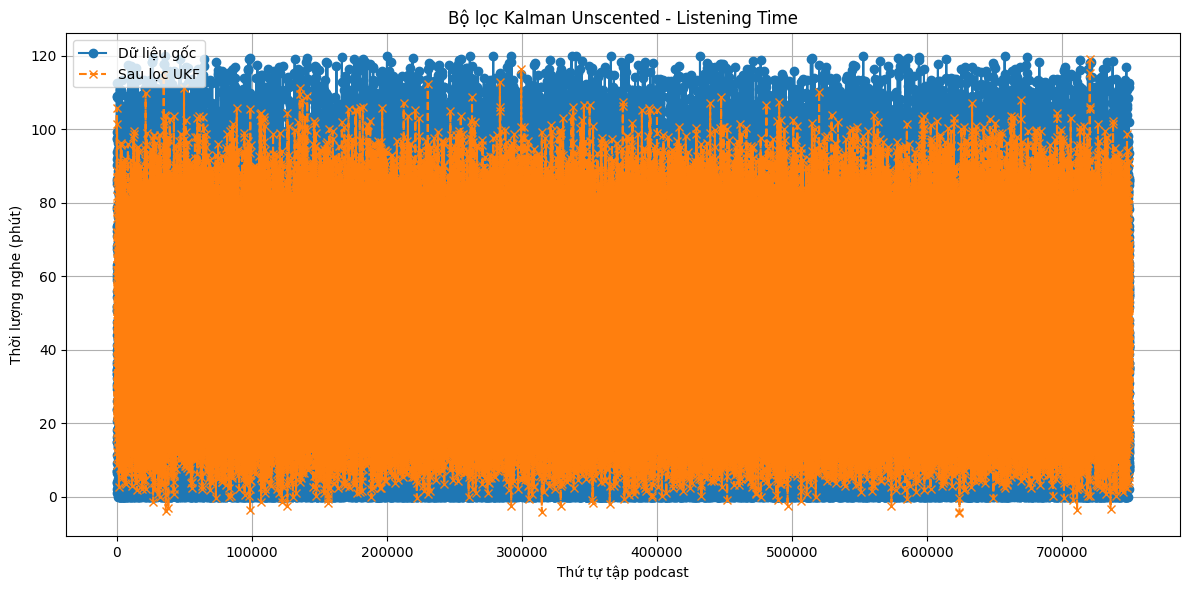

In [40]:

import matplotlib.pyplot as plt
from filterpy.kalman import UnscentedKalmanFilter, MerweScaledSigmaPoints
import numpy as np

# Define the state transition function
def fx(x, dt):
    # Example: Simple linear motion model (replace with your actual model)
    F = np.array([[1, dt], [0, 1]])
    return np.dot(F, x)

# Define the measurement function
def hx(x):
    # Example: Direct measurement (replace with your actual model)
    H = np.array([[1, 0]])
    return np.dot(H, x)

# Define the UKF
def unscented_kalman_filter(measurements, dt=1.0):
    points = MerweScaledSigmaPoints(2, alpha=.1, beta=2., kappa=1.)
    ukf = UnscentedKalmanFilter(dim_x=2, dim_z=1, dt=dt, fx=fx, hx=hx, points=points)

    # Initialize the UKF
    ukf.x = np.array([0., 0.])  # Initial state estimate
    ukf.P = np.eye(2) * 100  # Initial covariance matrix
    ukf.R = np.array([[1.]])  # Measurement noise covariance
    ukf.Q = np.eye(2) * 0.1  # Process noise covariance

    # Perform filtering
    filtered_measurements = []
    for measurement in measurements:
        ukf.predict()
        ukf.update(np.array([measurement]))
        filtered_measurements.append(ukf.x[0])  # Append the estimated state value

    return np.array(filtered_measurements)

# Apply the UKF to the 'Listening_Time_minutes' column
if 'Listening_Time_minutes' in df_sauloc.columns:
    listening_times = df_sauloc['Listening_Time_minutes'].values
    filtered_listening_times = unscented_kalman_filter(listening_times)
    df_sauloc['Listening_Time_minutes_UKF'] = filtered_listening_times

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df_sauloc['Listening_Time_minutes'], label="Dữ liệu gốc", marker='o')
if 'Listening_Time_minutes_UKF' in df_sauloc.columns:
    plt.plot(df_sauloc['Listening_Time_minutes_UKF'], label="Sau lọc UKF", linestyle="--", marker='x')
plt.title("Bộ lọc Kalman Unscented - Listening Time")
plt.xlabel("Thứ tự tập podcast")
plt.ylabel("Thời lượng nghe (phút)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
